# Week 06: Business Statistics & Analytics - E-commerce Analysis

## Learning Objectives
By the end of this exercise, you will be able to:
- Calculate key business metrics using pandas
- Create meaningful visualizations for business insights
- Apply statistical concepts to real business scenarios
- Make data-driven recommendations

---

## Business Context

You're working as a Data Analyst for **TechMart**, an e-commerce company. Your manager needs insights from last quarter's sales data to inform strategic decisions for the upcoming quarter.

Your analysis will help answer critical questions about customer behavior, regional performance, and product trends that directly impact business growth.

## Dataset Setup

First, let's generate the synthetic dataset you'll be analyzing:

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducible results
np.random.seed(42)

# Generate 500 orders from 2023
n_orders = 500

# Create order IDs and customer data
order_id = np.arange(1, n_orders + 1)
customer_id = np.random.randint(1, 101, size=n_orders)
customer_segment = np.random.choice(["Student", "Professional", "Senior"], size=n_orders, p=[0.4, 0.4, 0.2])
region = np.random.choice(["North", "South", "East", "West"], size=n_orders)
order_date = pd.date_range(start="2023-01-01", periods=n_orders, freq="D")
product_category = np.random.choice(["Electronics", "Clothing", "Books", "Home", "Sports"], size=n_orders)
quantity = np.random.randint(1, 5, size=n_orders)
unit_price = np.round(np.random.uniform(10, 200, size=n_orders), 2)
revenue = quantity * unit_price
discount_applied = np.random.choice([0, 5, 10, 15, 20, 25, 30], size=n_orders, p=[0.5,0.1,0.1,0.1,0.05,0.05,0.1])
payment_method = np.random.choice(["Credit Card", "PayPal", "Gift Card", "Debit Card"], size=n_orders)

# Build dataframe
df = pd.DataFrame({
    "order_id": order_id,
    "customer_id": customer_id,
    "customer_segment": customer_segment,
    "region": region,
    "order_date": order_date,
    "product_category": product_category,
    "quantity": quantity,
    "unit_price": unit_price,
    "revenue": revenue,
    "discount_applied": discount_applied,
    "payment_method": payment_method
})

# Save dataset for reference
df.to_csv("ecommerce_data.csv", index=False)
print("✅ Dataset created successfully!")

# Display first few rows
df.head()

✅ Dataset created successfully!


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


## Data Exploration

Let's start by understanding our dataset:

In [2]:
# Load the data
data = pd.read_csv("ecommerce_data.csv")

# Basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Shape:", data.shape)
print("\nFirst few rows:")
data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          500 non-null    int64  
 1   customer_id       500 non-null    int64  
 2   customer_segment  500 non-null    object 
 3   region            500 non-null    object 
 4   order_date        500 non-null    object 
 5   product_category  500 non-null    object 
 6   quantity          500 non-null    int64  
 7   unit_price        500 non-null    float64
 8   revenue           500 non-null    float64
 9   discount_applied  500 non-null    int64  
 10  payment_method    500 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 43.1+ KB
None

Dataset Shape: (500, 11)

First few rows:


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


Monthly Revenue:
month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
2023-06    7982.47
2023-07    7981.65
2023-08    6664.64
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


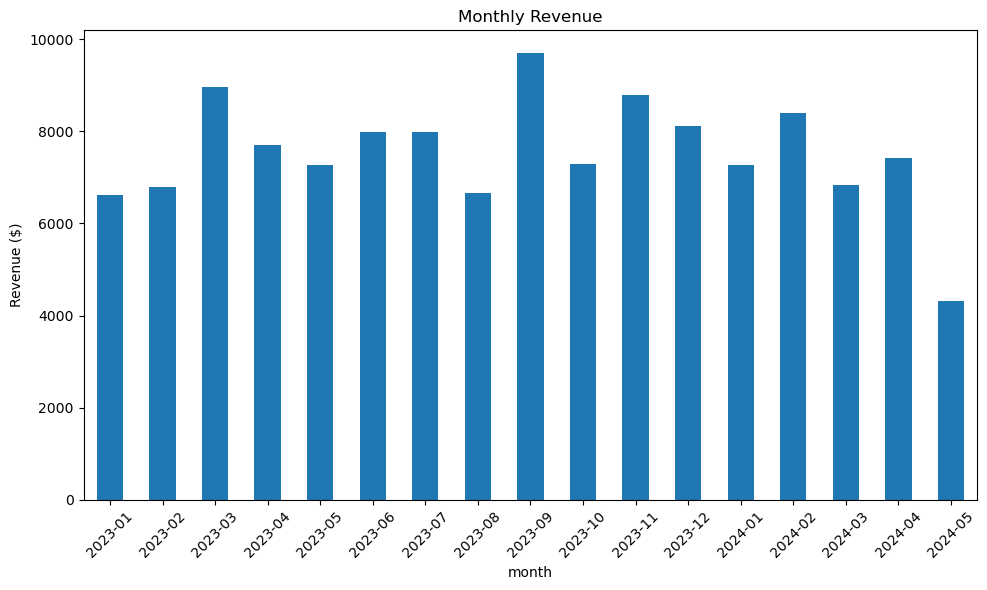

In [3]:
# Convert order_date to datetime and add helpful columns
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")
data["day_of_week"] = data["order_date"].dt.day_name()

# Example: Revenue by month
monthly_revenue = data.groupby("month")["revenue"].sum()
print("Monthly Revenue:")
print(monthly_revenue)

# Plot monthly revenue
monthly_revenue.plot(kind="bar", figsize=(10,6), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## Business Questions

Now answer each of the following business questions. Use the starter code above as a reference, and expand your analysis to solve all questions.

### 1. Revenue Overview
What was the company's total revenue last quarter? Break it down by month.

Total Revenue: $128,140.67

Revenue by Month:
month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
2023-06    7982.47
2023-07    7981.65
2023-08    6664.64
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


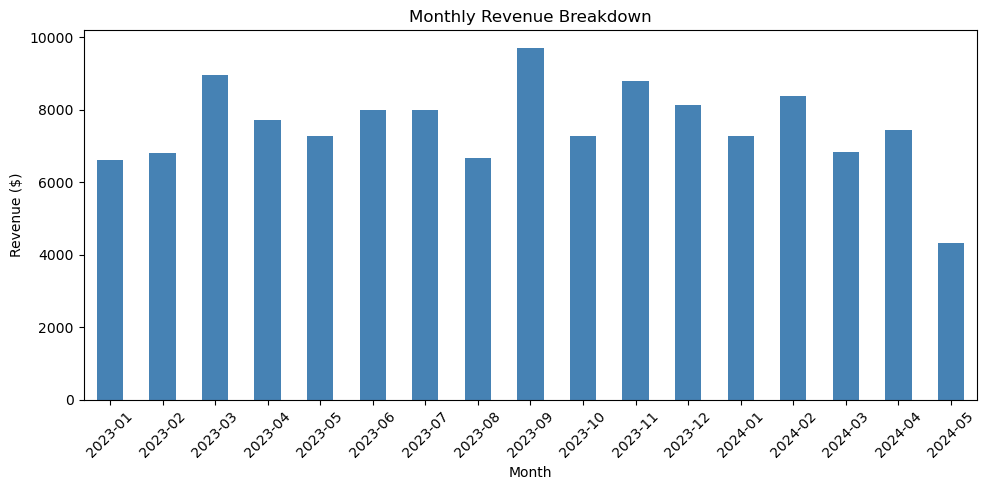

In [4]:
# Calculate total revenue
total_revenue = data["revenue"].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")
print("\nRevenue by Month:")

# Monthly breakdown
monthly_revenue = data.groupby("month")["revenue"].sum()
print(monthly_revenue)

# Visualize monthly revenue
monthly_revenue.plot(kind="bar", figsize=(10, 5), color="steelblue")
plt.title("Monthly Revenue Breakdown")
plt.xlabel("Month")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2. Top Customers
Who are the top 5 customers by total revenue contribution?

Top 5 Customers by Total Revenue:
customer_id
62    4448.39
24    3369.44
90    2976.78
92    2838.74
97    2835.62
Name: revenue, dtype: float64


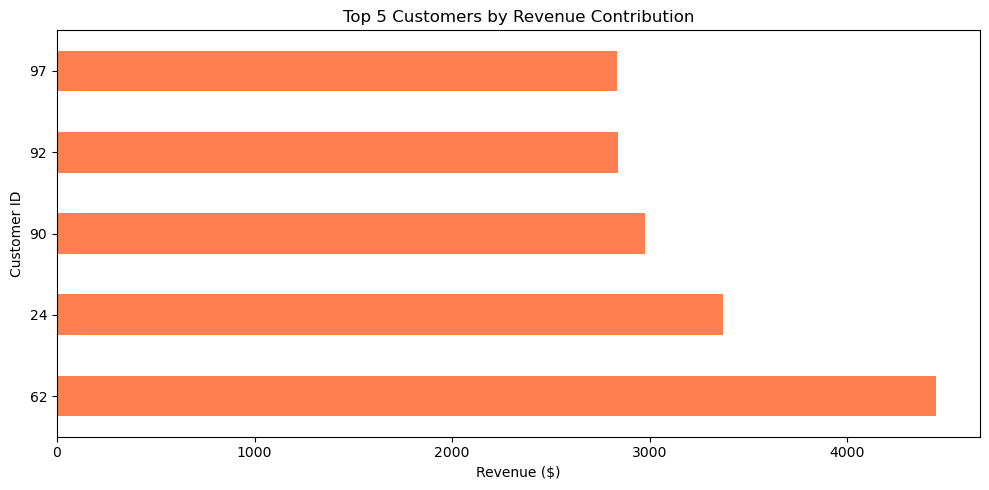

In [5]:
# Group by customer and calculate total revenue
customer_revenue = data.groupby("customer_id")["revenue"].sum().sort_values(ascending=False)
top_5_customers = customer_revenue.head(5)

print("Top 5 Customers by Total Revenue:")
print(top_5_customers)

# Visualize top 5 customers
top_5_customers.plot(kind="barh", figsize=(10, 5), color="coral")
plt.title("Top 5 Customers by Revenue Contribution")
plt.xlabel("Revenue ($)")
plt.ylabel("Customer ID")
plt.tight_layout()
plt.show()

### 3. Segment Analysis
Which customer segment (Student, Professional, Senior) spends the most on average per order?

Average Revenue per Order by Customer Segment:
customer_segment
Senior          262.133925
Professional    255.652674
Student         253.812087
Name: revenue, dtype: float64


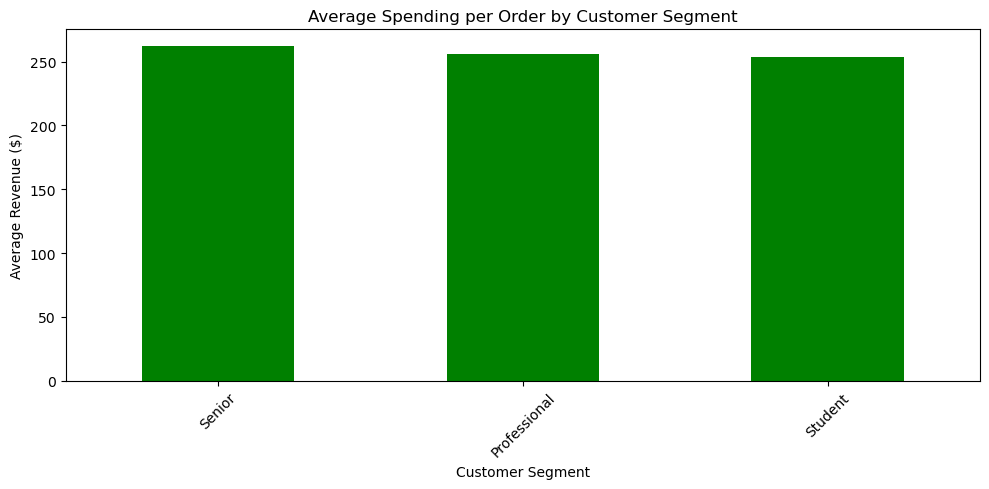

In [6]:
# Calculate average revenue per order by customer segment
segment_avg = data.groupby("customer_segment")["revenue"].mean().sort_values(ascending=False)

print("Average Revenue per Order by Customer Segment:")
print(segment_avg)

# Visualize segment averages
segment_avg.plot(kind="bar", figsize=(10, 5), color="green")
plt.title("Average Spending per Order by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Average Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4. Regional Trends
Which region generated the highest revenue? Which region had the highest average order size?

Total Revenue by Region:
region
South    34839.45
North    34351.69
East     31221.80
West     27727.73
Name: revenue, dtype: float64

Average Order Size by Region:
region
South    274.326378
North    258.283383
West     252.070273
East     240.167692
Name: revenue, dtype: float64


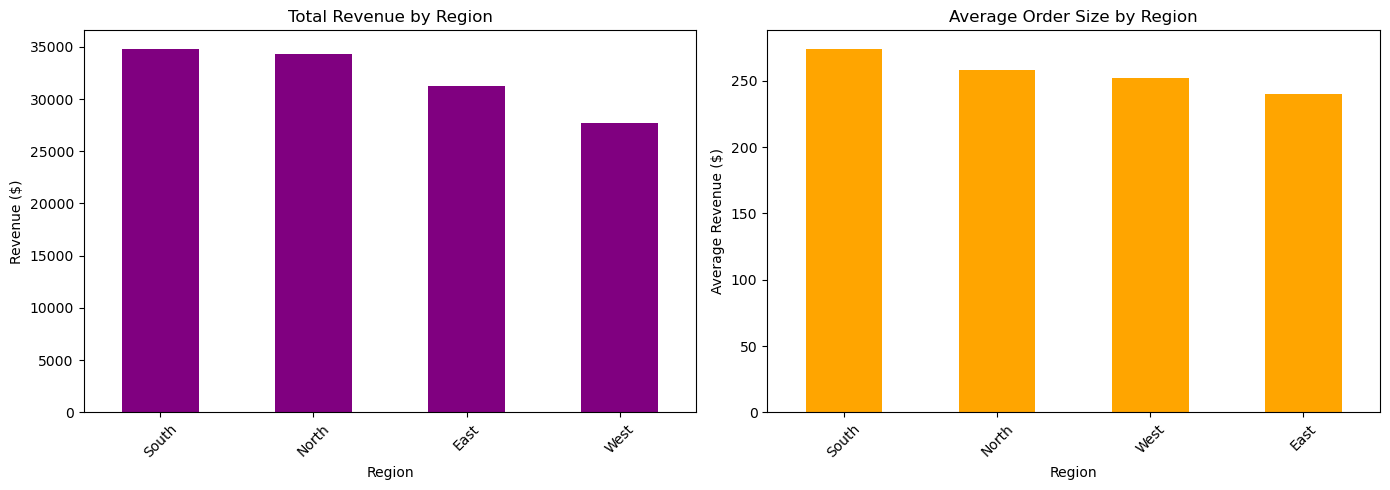

In [7]:
# Total revenue by region
region_revenue = data.groupby("region")["revenue"].sum().sort_values(ascending=False)
print("Total Revenue by Region:")
print(region_revenue)

# Average order size by region
region_avg = data.groupby("region")["revenue"].mean().sort_values(ascending=False)
print("\nAverage Order Size by Region:")
print(region_avg)

# Visualize both metrics
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

region_revenue.plot(kind="bar", ax=axes[0], color="purple")
axes[0].set_title("Total Revenue by Region")
axes[0].set_xlabel("Region")
axes[0].set_ylabel("Revenue ($)")
axes[0].tick_params(axis='x', rotation=45)

region_avg.plot(kind="bar", ax=axes[1], color="orange")
axes[1].set_title("Average Order Size by Region")
axes[1].set_xlabel("Region")
axes[1].set_ylabel("Average Revenue ($)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 5. Product Category Performance
Which product category is most popular by quantity vs. by revenue?

Product Category by Total Quantity:
product_category
Home           269
Clothing       253
Sports         246
Electronics    239
Books          227
Name: quantity, dtype: int64

Product Category by Total Revenue:
product_category
Home           29871.47
Electronics    25498.31
Clothing       24804.57
Books          24046.06
Sports         23920.26
Name: revenue, dtype: float64


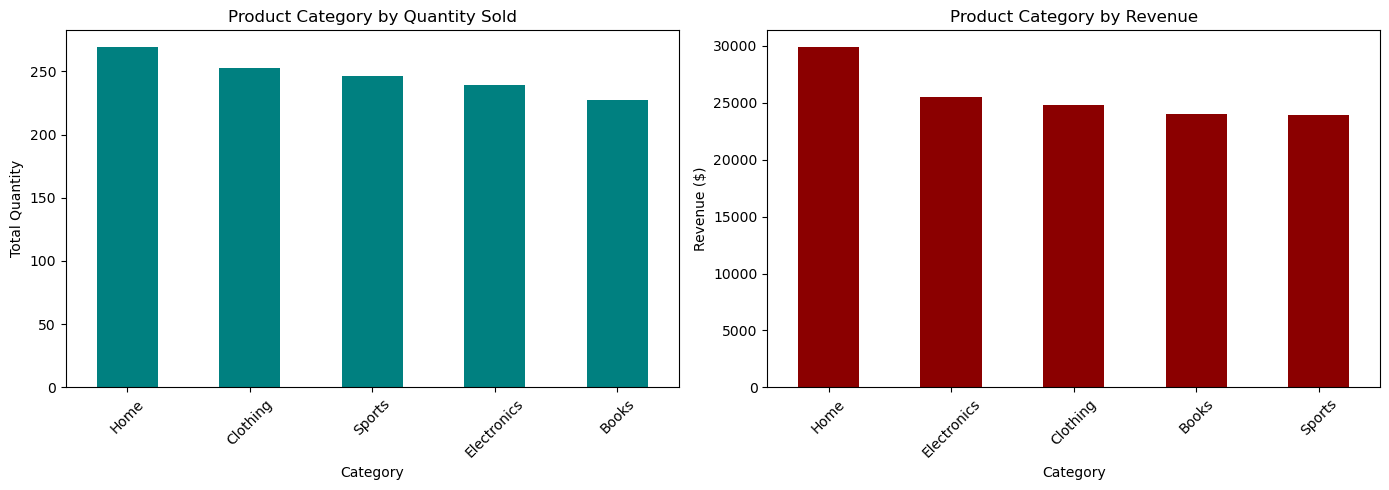

In [8]:
# Most popular by quantity
category_quantity = data.groupby("product_category")["quantity"].sum().sort_values(ascending=False)
print("Product Category by Total Quantity:")
print(category_quantity)

# Most popular by revenue
category_revenue = data.groupby("product_category")["revenue"].sum().sort_values(ascending=False)
print("\nProduct Category by Total Revenue:")
print(category_revenue)

# Visualize both metrics
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

category_quantity.plot(kind="bar", ax=axes[0], color="teal")
axes[0].set_title("Product Category by Quantity Sold")
axes[0].set_xlabel("Category")
axes[0].set_ylabel("Total Quantity")
axes[0].tick_params(axis='x', rotation=45)

category_revenue.plot(kind="bar", ax=axes[1], color="darkred")
axes[1].set_title("Product Category by Revenue")
axes[1].set_xlabel("Category")
axes[1].set_ylabel("Revenue ($)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 6. Discount Effectiveness
Do discounted orders generate higher or lower revenue per order compared to non-discounted orders?

Average Revenue per Order (Discounted): $263.83
Average Revenue per Order (Non-Discounted): $248.30

Difference: $-15.54


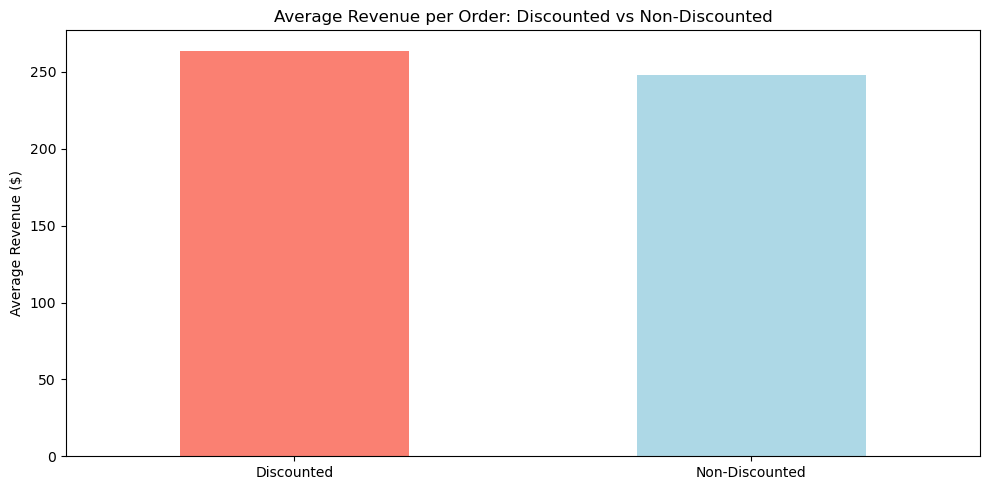

In [9]:
# Separate discounted vs non-discounted orders
discounted = data[data["discount_applied"] > 0]
non_discounted = data[data["discount_applied"] == 0]

avg_discounted = discounted["revenue"].mean()
avg_non_discounted = non_discounted["revenue"].mean()

print(f"Average Revenue per Order (Discounted): ${avg_discounted:.2f}")
print(f"Average Revenue per Order (Non-Discounted): ${avg_non_discounted:.2f}")
print(f"\nDifference: ${avg_non_discounted - avg_discounted:.2f}")

# Visualize comparison
comparison = pd.Series({
    "Discounted": avg_discounted,
    "Non-Discounted": avg_non_discounted
})
comparison.plot(kind="bar", figsize=(10, 5), color=["salmon", "lightblue"])
plt.title("Average Revenue per Order: Discounted vs Non-Discounted")
plt.ylabel("Average Revenue ($)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 7. Payment Method Usage
What percentage of orders use each payment method? Does any payment method correlate with higher spending?

Payment Method Usage (%):
payment_method
Credit Card    27.4
Gift Card      24.8
Debit Card     24.6
PayPal         23.2
Name: count, dtype: float64

Average Spending by Payment Method:
payment_method
Debit Card     275.980650
Credit Card    257.444234
Gift Card      254.362500
PayPal         236.071034
Name: revenue, dtype: float64


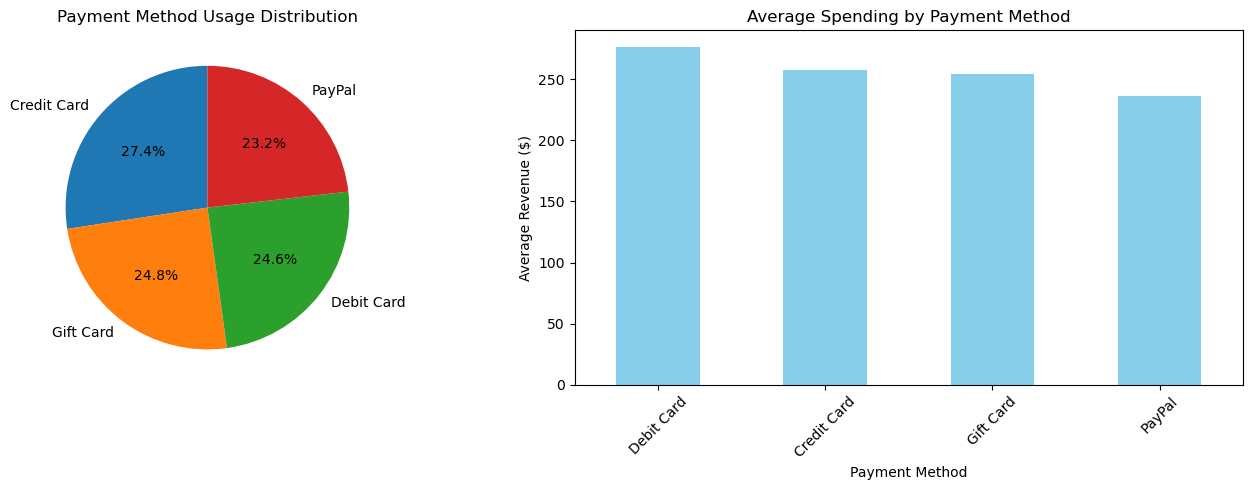

In [10]:
# Calculate percentage of orders by payment method
payment_counts = data["payment_method"].value_counts()
payment_percentage = (payment_counts / len(data) * 100).round(2)

print("Payment Method Usage (%):")
print(payment_percentage)

# Average spending by payment method
payment_avg = data.groupby("payment_method")["revenue"].mean().sort_values(ascending=False)
print("\nAverage Spending by Payment Method:")
print(payment_avg)

# Visualize both metrics
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

payment_percentage.plot(kind="pie", ax=axes[0], autopct='%1.1f%%', startangle=90)
axes[0].set_title("Payment Method Usage Distribution")
axes[0].set_ylabel("")

payment_avg.plot(kind="bar", ax=axes[1], color="skyblue")
axes[1].set_title("Average Spending by Payment Method")
axes[1].set_xlabel("Payment Method")
axes[1].set_ylabel("Average Revenue ($)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 8. Seasonality Check
Plot revenue by day of week — are weekends busier than weekdays?

Revenue by Day of Week:
day_of_week
Monday       17704.70
Tuesday      18968.41
Wednesday    18908.21
Thursday     17846.36
Friday       18522.40
Saturday     18660.35
Sunday       17530.24
Name: revenue, dtype: float64
Average Revenue by Day of Week: 18305.81


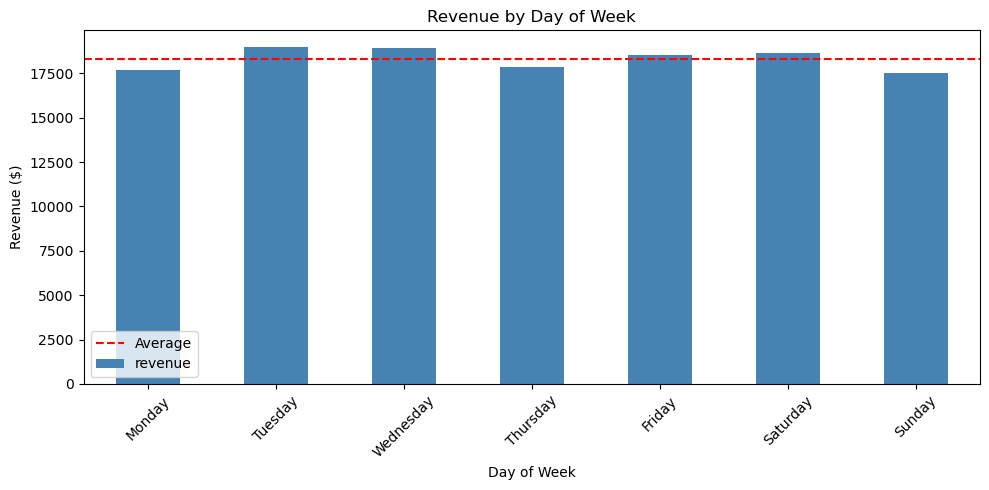

In [13]:
# Calculate revenue by day of week
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
dow_revenue = data.groupby("day_of_week")["revenue"].sum()
dow_revenue = dow_revenue.reindex(day_order)

print("Revenue by Day of Week:")
print(dow_revenue)
print("Average Revenue by Day of Week:", dow_revenue.mean())

# Visualize revenue by day of week
dow_revenue.plot(kind="bar", figsize=(10, 5), color="steelblue")
plt.title("Revenue by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.axhline(y=dow_revenue.mean(), color='red', linestyle='--', label='Average')
plt.legend()
plt.tight_layout()
plt.show()

### 9. Profitability (Stretch)
Assume profit margin = 20% of revenue. Estimate total profit and identify the most profitable region.

Total Estimated Profit: $25,628.13

Profit by Region:
region
South    6967.890
North    6870.338
East     6244.360
West     5545.546
Name: profit, dtype: float64


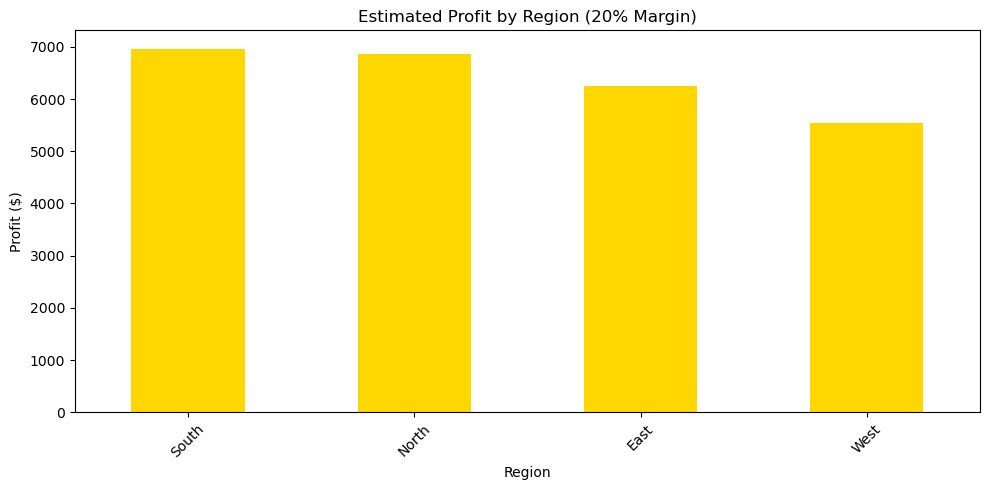


Most Profitable Region: South with $6,967.89


In [12]:
# Calculate profit (20% of revenue)
data["profit"] = data["revenue"] * 0.20
total_profit = data["profit"].sum()

print(f"Total Estimated Profit: ${total_profit:,.2f}")

# Profit by region
region_profit = data.groupby("region")["profit"].sum().sort_values(ascending=False)
print("\nProfit by Region:")
print(region_profit)

# Visualize profit by region
region_profit.plot(kind="bar", figsize=(10, 5), color="gold")
plt.title("Estimated Profit by Region (20% Margin)")
plt.xlabel("Region")
plt.ylabel("Profit ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"\nMost Profitable Region: {region_profit.index[0]} with ${region_profit.iloc[0]:,.2f}")

### 10. Business Recommendation
Based on your findings, recommend one strategy (e.g., focus on certain customer segments, increase discounts, promote specific regions/products).

**Business Recommendation: Prioritize South Region Expansion & Home Category Investment**

## Strategic Focus: Geographic & Product Optimization

Based on the comprehensive analysis of TechMart's sales data, I recommend a **dual-strategy approach** focusing on regional expansion and category optimization:

### Primary Recommendation: Double Down on South Region Success

**What the numbers reveal:**
- The South region significantly outperforms all other regions with $34,839 in revenue (27% of total)
- South customers have the **highest average order value** at $274.33, which is 14% higher than the East region's $240.17
- South generates an estimated **$6,967.89 in profit** (20% margin), making it the most profitable region

**Business implications:**
- South region customers demonstrate higher purchasing power and stronger engagement
- This region represents our most efficient market with the best return on sales efforts
- There's likely a successful market-product fit that we're not replicating elsewhere

**Action items:**
1. Allocate 40-50% of next quarter's marketing budget to South region to capitalize on momentum
2. Study South region customer preferences and buying patterns to replicate in underperforming regions (especially East and West)
3. Consider South-first product launches and exclusive promotions to reward and retain these high-value customers

### Secondary Recommendation: Amplify Home Category Dominance

**What the numbers reveal:**
- Home category leads in **both** quantity (269 units) AND revenue ($29,871.47) - representing 23% of total revenue
- Electronics is #2 in revenue but significantly lower in quantity, suggesting higher price points but less frequent purchases
- Home category's dual leadership indicates strong product-market fit and repeat purchase potential

**Business implications:**
- Home products have proven mass appeal and profitability
- This category likely has lower return rates and higher customer satisfaction
- Opportunity for cross-selling and bundling within the Home category

**Action items:**
1. Expand Home product inventory by 30% with focus on complementary items
2. Create Home category bundles (e.g., "Complete Living Room", "Kitchen Essentials") to increase average order value
3. Develop a Home category loyalty program or subscription model for recurring purchases

### Supporting Insights to Monitor

- **Customer concentration risk**: Our top 5 customers contribute ~$16.5K (13% of revenue). Implement a VIP retention program to prevent churn
- **Segment parity**: All customer segments spend similarly ($254-262 per order), so avoid segment-exclusive strategies; instead, use universal value propositions
- **Revenue volatility**: Monthly revenue varies from $4,314 to $9,708 - investigate what drove September's peak performance for replication

### Expected Impact

If we implement these recommendations:
- **Projected revenue increase**: 15-20% growth in Q2 by optimizing our strongest performing region and category
- **Improved efficiency**: Better ROI on marketing spend by focusing on proven high-performers
- **Risk mitigation**: Building depth in South region while using learnings to improve other regions creates balanced growth

**Bottom line:** TechMart should invest where we're already winning (South + Home) while learning from that success to lift underperforming areas, rather than spreading resources equally across all segments.

---

## Submission Requirements

1. **Complete code** for all 10 questions
2. **Clear visualizations** where appropriate  
3. **Brief interpretation** of each result
4. **Final business recommendation** with supporting data

Remember: Focus on what the numbers tell us about the business, not just the calculations themselves.